<a href="https://colab.research.google.com/github/megoeggo/colab/blob/main/Mego_Franks_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project
Choose one of the research briefs options below to focus on for this final project:

1. [Public Awareness of Alcohol  as a Risk Factor for Cancer](https://hints.cancer.gov/docs/Briefs/HINTS_Brief_47.pdf)

Use this dataset to complete the following steps:

https://drive.google.com/file/d/1c7Nv3xTjGsYpHlT5oXPFfXurmDbl1AlB/view?usp=sharing

1. First, read through the brief you've chosen.
2. Next, using what you have learned about cleaning data and creating visualizations, reproduce one of the data visualizations included in your brief. Use the Python libraries we discussed in class for this project (Pandas, matplotlib), though you can also use other libraries as needed. Try to recreate it as faithfully as possible (using the same ranges, numbers, and general layout).
3. Then, create another visualization based on a different demographic variable of your choice from the data. This visualization should relate generally to the topic of your brief, but should investigate a new aspect of it from the HINTS dataset. For example, if there was hypothetically a brief about age, amount of weekly exercise, and heart disease, for your final project you could investigate age, amount of exercise, and BMI category for respondents.
4. Finally, write a reflection about this project (see reflection prompts below).

If needed, you can find the codebook for this dataset here:

https://hints.cancer.gov/data/survey-instruments.aspx#H5C4

And you can download the original data here:

https://hints.cancer.gov/data/Default.aspx


# Recreate a visualization

Insert your code into the code box below to recreate a visualization from your brief. Make sure to comment your code!

In [ ]:
# code for recreating a visualization

# first import libraries

!pip install seaborn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import style

In [ ]:
# now import data

hints_data_raw = pd.read_csv("/content/hints5_cycle4_final_project.csv")

In [ ]:
# create a subset of the data to look at just the average drinks per week column

hints_data_drinks = hints_data_raw[["AvgDrinksPerWeek"]]

In [ ]:
# replace all missing data with a negative number, so it will work with a numeric loop

hints_data_drinks = hints_data_drinks.apply(lambda x: x.replace({"^.*Missing Data.*$":-1}, regex=True))



In [ ]:
# also turn the data type to numeric so that the loop works

hints_data_drinks = hints_data_drinks.apply(pd.to_numeric, errors='coerce')

hints_data_drinks.dtypes

AvgDrinksPerWeek    float64
dtype: object

In [ ]:
# define the aforementioned loop - this will turn the data into the ranges seen in the infographic; 0 drinks a week, 1-10 drinks a week, etc.

def drink_ranges(AvgDrinksPerWeek):
  if AvgDrinksPerWeek == 0:
    return "0"
  if AvgDrinksPerWeek >= 1 and AvgDrinksPerWeek <= 10:
    return "1-10"
  if AvgDrinksPerWeek >= 11 and AvgDrinksPerWeek <= 20:
    return "11-20"
  if AvgDrinksPerWeek >= 21 and AvgDrinksPerWeek <=30:
    return "21-30"
  if AvgDrinksPerWeek >= 31:
    return "31+"
  else:
    return "Missing Data"


In [ ]:
# this for loop does the work of turning the data points into their assigned ranges

ranges_list = []
for categ in hints_data_drinks.AvgDrinksPerWeek.items():
  ranges_list.append(drink_ranges(categ[1]))

print(ranges_list)

['11-20', '0', '1-10', '1-10', '0', '1-10', '1-10', '0', '1-10', '0', '1-10', '1-10', '11-20', '0', '0', '1-10', '0', '1-10', 'Missing Data', '0', '1-10', '1-10', '0', '0', '1-10', '1-10', '1-10', '0', '0', '1-10', '0', '0', '1-10', '0', '0', '0', '11-20', '0', '1-10', '0', '1-10', '11-20', '1-10', '0', '1-10', '0', '1-10', '0', '0', '0', '0', '0', '1-10', '0', '0', '0', '1-10', '1-10', '0', '1-10', '0', 'Missing Data', '0', '1-10', '1-10', '1-10', '0', '11-20', '1-10', '0', '1-10', '0', '0', '1-10', '0', '1-10', '1-10', '0', '1-10', '1-10', '0', '0', '1-10', '0', '1-10', '1-10', '0', '0', '0', '1-10', '1-10', '1-10', '0', '0', '11-20', '0', '0', '0', '0', 'Missing Data', '1-10', '0', '0', '0', 'Missing Data', '11-20', '0', 'Missing Data', '0', '0', '1-10', '1-10', '11-20', '0', '11-20', '0', '0', '21-30', '0', '0', '1-10', '1-10', '0', '1-10', '0', '0', '0', '0', '0', '0', '0', '1-10', '1-10', '1-10', '1-10', '1-10', '0', '0', '0', '0', '1-10', 'Missing Data', '0', '0', '0', '1-10', '

In [ ]:
# this for loop shows the counts for each range

range_freq_dict = {}
for category in ranges_list:
  if category in range_freq_dict:
    range_freq_dict[category] += 1
  else:
    range_freq_dict[category] = 1

range_freq_dict

{'11-20': 207,
 '0': 1866,
 '1-10': 1239,
 'Missing Data': 431,
 '21-30': 87,
 '31+': 35}

In [ ]:
# now we need to make our counts and ranges into variables so we can make a new dataframe

bar_range_vals = []
bar_count_vals = []
for key, value in range_freq_dict.items():
  bar_range_vals.append(key)
  bar_count_vals.append(value)

print(bar_range_vals)
print(bar_count_vals)

['11-20', '0', '1-10', 'Missing Data', '21-30', '31+']
[207, 1866, 1239, 431, 87, 35]


In [ ]:
# make the new dataframe from ranges and counts

barchart = pd.DataFrame({"ranges": bar_range_vals, "counts": bar_count_vals})



In [ ]:
# define the ranges as the category, and turn the counts into percentages

barchart["ranges"] = barchart["ranges"].astype("category")

barchart["counts"] = (100. * barchart["counts"] / barchart["counts"].sum()).round(1)




In [ ]:
# reorder the range categories into a logical order

barchart["ranges"] = barchart["ranges"].cat.reorder_categories(["0", "1-10", "11-20", "21-30", "31+", "Missing Data"], ordered=True)



In [ ]:
# for our chart we want all the bars except the last one to be the same color, so define the color palette now

color = ["#0a49c7", "#0a49c7", "#0a49c7", "#0a49c7", "#0a49c7", "gray"]

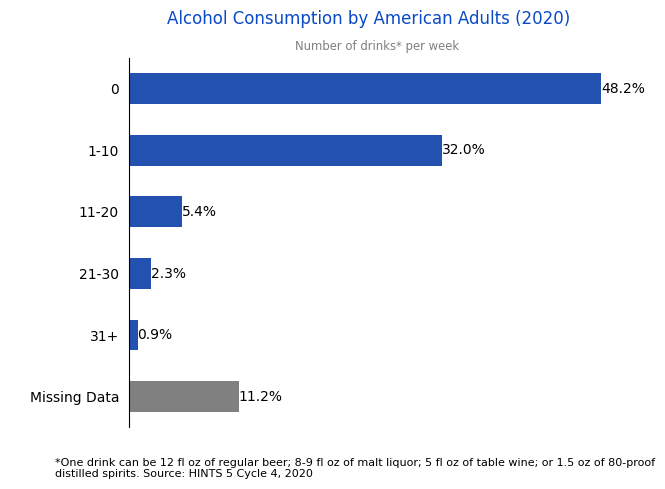

In [ ]:
# create the barplot and add styling

qc = sns.barplot(y="ranges", x="counts", data=barchart,
            errorbar=None,
            palette=color,
               width=.5,
                );
plt.bar_label(qc.containers[0], fmt="%.1f%%")
plt.suptitle("Alcohol Consumption by American Adults (2020)", color="#0a49c7")
plt.title("Number of drinks* per week", color="gray", size="small")
plt.ylabel(" ")
plt.xlabel(" ")
plt.tick_params(left = False)
qc.axes.get_xaxis().set_visible(False)
qc.axes.spines["top"].set_visible(False)
qc.axes.spines["bottom"].set_visible(False)
qc.axes.spines["right"].set_visible(False)
plt.figtext(0.01,0.01, "*One drink can be 12 fl oz of regular beer; 8-9 fl oz of malt liquor; 5 fl oz of table wine; or 1.5 oz of 80-proof distilled spirits. Source: HINTS 5 Cycle 4, 2020", wrap=True, fontsize=8)
plt.show()

# Your explanation for the new visualization

**What does your new visualization show?**

The relationship between how mnay drinks someone consumes per week, and how worried they are about getting cancer.

# Your code for the new visualization

Insert your code in the code block below to create a new visualization based on a different demographic variable of your choice. Make sure to comment your code!

In [23]:
# new visualization code

worrydata = hints_data_raw["FreqWorryCancer"]

worrydata.value_counts()



Somewhat                                1066
Slightly                                 983
Moderately                               684
Not at all                               654
Extremely                                405
Missing data (Not Ascertained)            68
Multiple responses selected in error       5
Name: FreqWorryCancer, dtype: int64

# Reflections
Edit this code block to answer the following questions.

**1. Was the original visualization that you reproduced from your brief useful for the data that were being represented? Why or why not? How could it have been improved?**



**2. For the new visualization you created, what type of visualization did you choose and why did you choose that type?**



**3. Were you able to understand the data you were working with based on the brief you chose? Were there any additional data you wish you had to enhance your analysis / visualization?**

